## Problem Statement: To prepare a machine learning  based model, trained on the House Price Prediction Dataset. 

### These are the steps required for any data science task or project.

### Data Gathering:
##### a. API
##### b. Web Scraping
##### c. Secondary or primary data from different sources like kaggle, github, etc.

#### Data Cleaning:
##### a. Handle missing values: Impute or remove missing data.
##### b. Remove duplicate records.
##### c. Detect and treat outliers.
##### d. Correct inconsistent data.

#### Data Transformation:
##### a. Feature scaling: Normalize or standardize numerical features.
##### b. Feature encoding: Convert categorical variables into numerical representations.
##### c. Feature engineering: Create new features or transform existing ones.
##### d. Dimensionality reduction: Reduce the number of features.

#### Data Integration:
##### a. Combine data from multiple sources.
##### b. Ensure consistency and compatibility between datasets.

#### Data Reduction:
##### a. Reduce dataset size if necessary.
##### b. Apply sampling techniques if needed.

#### Data Normalization:
##### a. Normalize data for improved efficiency and accuracy.

#### Data Splitting:
##### a. Split the dataset into training, validation, and test sets.

#### Data Visualization:
##### a. Explore data visually to gain insights.

#### Documentation:
##### a. Keep track of preprocessing steps.
##### b. Document assumptions and decisions made.

In [1]:
#Importing the libraries required for importing the data i.e house price prediction and ignore warnings
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Here we are already having the data from kaggle
#Importing the data i.e house price prediction
df = pd.read_csv('./HousePricePrediction.csv')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


### Now understanding the attributes used in the house price prediction so as to proceed further.

##### Id	To count the records.
##### MSSubClass	 Identifies the type of dwelling involved in the sale.
##### MSZoning	Identifies the general zoning classification of the sale.
##### LotArea	 Lot size in square feet.
##### LotConfig	Configuration of the lot
##### BldgType	Type of dwelling
##### OverallCond	Rates the overall condition of the house
##### YearBuilt	Original construction year
##### YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
##### Exterior1st	Exterior covering on house
##### BsmtFinSF2	Type 2 finished square feet.
##### TotalBsmtSF	Total square feet of basement area
##### SalePrice	To be predicted

In [3]:
#Checking the dataset how it looks like
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
#Dropping the columns which are unwanted and unique and not in use.
#First we are going to list it.
df['Id']

0          0
1          1
2          2
3          3
4          4
        ... 
2914    2914
2915    2915
2916    2916
2917    2917
2918    2918
Name: Id, Length: 2919, dtype: int64

In [6]:
df = df.drop(columns = ['Id'])

In [7]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


##### In conclusion, we can say that there are four categorical attributes: MSZoning, LotConfig, BldgType, Exterior1st, and eight numerical attributes: MSSubClass,	LotArea, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF, & SalePrice.

In [9]:
#Understanding the data
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [10]:
#As steps provided, we will move further onto the missing values, whether to drop or impute the missing values
df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [11]:
#The ones which are less than 5% MCAR, we can drop as it doesn't affect our data
df = df.dropna(subset=['MSZoning', 'Exterior1st', 'BsmtFinSF2','TotalBsmtSF'])

In [12]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [13]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1453
dtype: int64

#### Keeping aside the missing values, we first convert the cstegorical values to numerical values using OneHotEncoder

In [14]:
# Importing the libraries needed
from sklearn.preprocessing import OneHotEncoder

# Select the columns we want to one-hot encode
categorical_values = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

# Extract the columns to be encoded from the DataFrame
data_to_encode = df[categorical_values]

# Drop rows with missing values
data_to_encode = data_to_encode.dropna()

# Initialize the OneHotEncoder object
encoder = OneHotEncoder(drop='first')

# Fit and transform the data to one-hot encoded format
encoded_data = encoder.fit_transform(data_to_encode)

# Convert the one-hot encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_values))

# Reset the indices of both DataFrames to ensure alignment
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
# Use original index to ensure proper alignment
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original columns that have been encoded
df = df_encoded.drop(columns=categorical_values)

In [15]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,1936,7,1970,1970,0.0,546.0,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,160,1894,5,1970,1970,0.0,546.0,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,20,20000,7,1960,1996,0.0,1224.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,85,10441,5,1992,1992,0.0,912.0,NaN,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Filling missing values through model approach
#Importing libraries needed
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Splitting data into two parts - with and without missing SalePrice values
data_with_sale_price = df.dropna(subset=['SalePrice'])
data_without_sale_price = df[df['SalePrice'].isnull()]

# Training a simple linear regression model to predict SalePrice
X_train = data_with_sale_price.drop(columns=['SalePrice'])
y_train = data_with_sale_price['SalePrice']
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting SalePrice for missing values
X_missing = data_without_sale_price.drop(columns=['SalePrice'])
predicted_sale_price = regressor.predict(X_missing)

# Imputing missing SalePrice values with predicted values
df.loc[df['SalePrice'].isnull(), 'SalePrice'] = predicted_sale_price


In [17]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,1936,7,1970,1970,0.0,546.0,118029.583331,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,160,1894,5,1970,1970,0.0,546.0,130587.461890,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,20,20000,7,1960,1996,0.0,1224.0,194534.998480,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,85,10441,5,1992,1992,0.0,912.0,215540.166087,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.isna().sum()

MSSubClass             0
LotArea                0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
BsmtFinSF2             0
TotalBsmtSF            0
SalePrice              0
MSZoning_FV            0
MSZoning_RH            0
MSZoning_RL            0
MSZoning_RM            0
LotConfig_CulDSac      0
LotConfig_FR2          0
LotConfig_FR3          0
LotConfig_Inside       0
BldgType_2fmCon        0
BldgType_Duplex        0
BldgType_Twnhs         0
BldgType_TwnhsE        0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
dtype: int64

In [19]:
#Here we had handled the missing values where we had imputed it through model based approach imputation.
#Now we'll move onto duplicate records
df.duplicated().sum()

8

In [20]:
#Whenever there are duplicate records, its advisable to remove them.
df = df.drop_duplicates()

In [21]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,1936,7,1970,1970,0.0,546.0,118029.583331,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,160,1894,5,1970,1970,0.0,546.0,130587.461890,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,20,20000,7,1960,1996,0.0,1224.0,194534.998480,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,85,10441,5,1992,1992,0.0,912.0,215540.166087,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

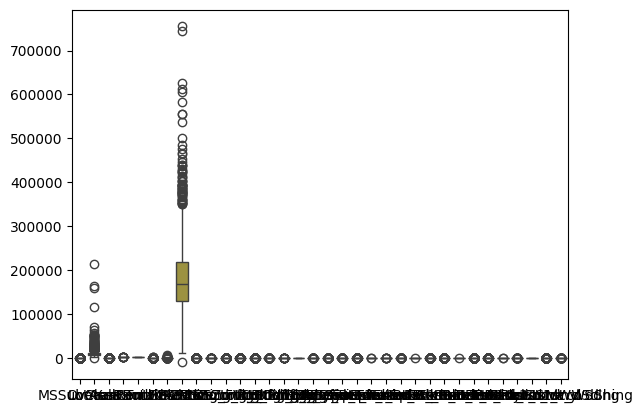

In [22]:
#Now coming onto the outlier detection
#Outlier is the one which comes as an odd data point which comes out of the box.
#Importing libraries needed
import seaborn as sns 
import matplotlib.pyplot as plt

#Creating and visualizing the graphs
sns.boxplot(df)

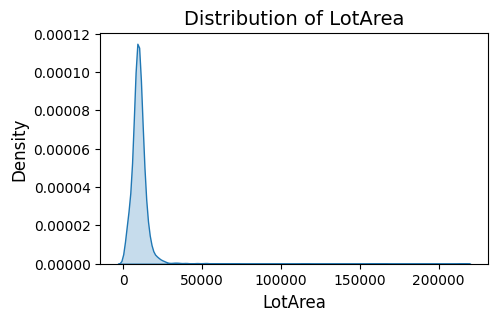

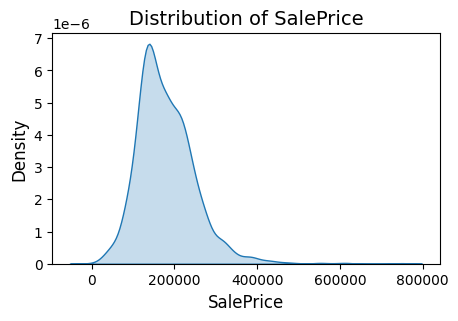

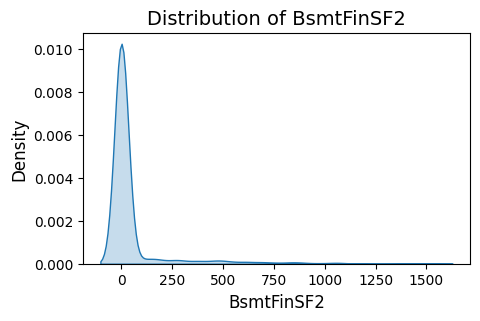

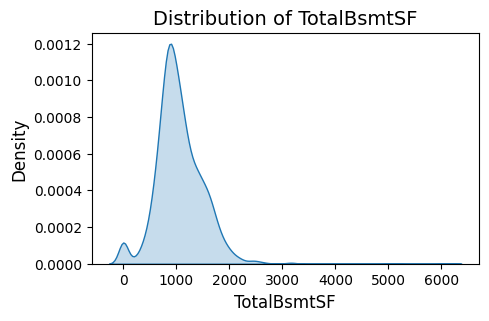

In [23]:
#As seen from graohs we can say that 2nd and 8th one having more outliers
#If we define it they are LotArea and Sale Price
#By not removing outliers, we can consider transforming them so as to not affect data. 
#So, first let see the data distribution in these two attributes.
outlier_col = ['LotArea', 'SalePrice', 'BsmtFinSF2', 'TotalBsmtSF']
# Plotting individual KDE plots for each numerical column
for column in outlier_col:
    plt.figure(figsize=(5, 3))  # Set the size of each plot
    sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column
    plt.title(f"Distribution of {column}", fontsize=14)  # Set the title of the plot
    plt.xlabel(column, fontsize=12)  # Set the label for x-axis
    plt.ylabel("Density", fontsize=12)  # Set the label for y-axis
    plt.show()  # Show the plot

In [24]:
#As they are right skewed, we can consider moving with transformation which are highly supported i.e logarothmic and 
#square root transformation
import numpy as np

In [25]:
# Feature to be transformed is SalePrice for moderately skewed data
df_saleprice = df['SalePrice']

# Take absolute value to ensure all values are non-negative
df_saleprice_abs = df_saleprice.abs()

# Apply square root transformation to the absolute values
transformed_saleprice = df_saleprice_abs.apply(lambda x: x**(1/2))

# Replace the original column with the transformed values
df['SalePrice'] = transformed_saleprice


In [26]:
#Feature to be transformed is SalePrice, BsmtFinSF2, TotalBsmtSF for moderately skewed data
df_saleprice = df['SalePrice']
df_bsmtfinsf2 = df['BsmtFinSF2']
df_totalbsmtsf = df['TotalBsmtSF']
df_lotarea = df['LotArea']

# Apply square root transformation
transformed_saleprice = df_saleprice.apply(lambda x: x**(1/2))
transformed_bsmfinsf2 = df_bsmtfinsf2.apply(lambda x: x**(1/2))
transformed_totalbsmtsf = df_totalbsmtsf.apply(lambda x: x**(1/2))
transformed_lotarea = df_lotarea.apply(lambda x: x**(1/2))

# Replace the original column with the transformed values
df['SalePrice'] = transformed_saleprice
df['BsmtFinSF2'] = transformed_bsmfinsf2
df['TotalBsmtSF'] = transformed_totalbsmtsf
df['LotArea'] = transformed_lotarea

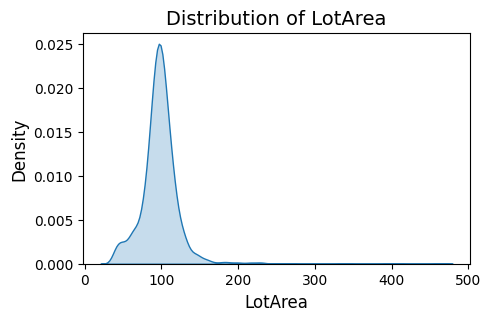

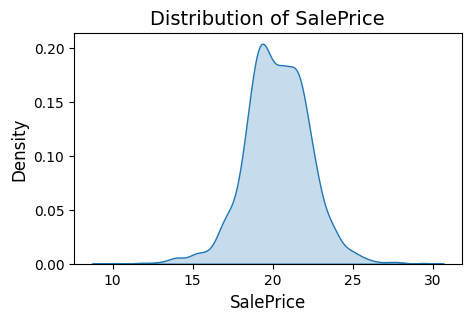

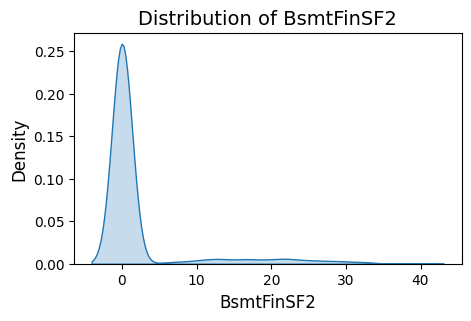

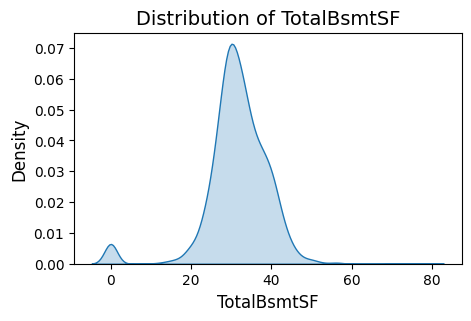

In [27]:
#Now we will check the distribution of the new transformed columns
outlier_col = ['LotArea', 'SalePrice', 'BsmtFinSF2', 'TotalBsmtSF']
# Plotting individual KDE plots for each numerical column
for column in outlier_col:
    plt.figure(figsize=(5, 3))  # Set the size of each plot
    sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column
    plt.title(f"Distribution of {column}", fontsize=14)  # Set the title of the plot
    plt.xlabel(column, fontsize=12)  # Set the label for x-axis
    plt.ylabel("Density", fontsize=12)  # Set the label for y-axis
    plt.show()  # Show the plot

<Axes: >

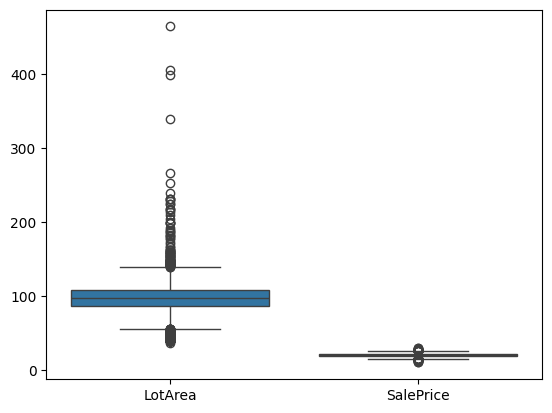

In [28]:
#And they both are transformed and by looking it seems the outliers are treated very well, so lets check
sns.boxplot(df[['LotArea', 'SalePrice']])

In [29]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,91.923882,5,2003,2003,0.0,29.257478,21.368622,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,97.979590,8,1976,1976,0.0,35.524639,20.640450,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,106.066017,5,2001,2002,0.0,30.331502,21.742996,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,97.724101,5,1915,1970,0.0,27.495454,19.343364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,119.415242,5,2000,2000,0.0,33.837849,22.360680,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,44.000000,7,1970,1970,0.0,23.366643,18.535219,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,160,43.520110,5,1970,1970,0.0,23.366643,19.009705,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,20,141.421356,7,1960,1996,0.0,34.985711,21.001458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,85,102.181212,5,1992,1992,0.0,30.199338,21.546764,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Importing libraries that are needed
from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['MSSubClass', 'LotArea', 'BsmtFinSF2', 'TotalBsmtSF']

# Create an instance of the Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [31]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.071657,-0.213883,5,2003,2003,-0.340855,-0.288616,21.368622,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.872926,0.021430,8,1976,1976,-0.340855,0.515193,20.640450,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071657,0.335652,5,2001,2002,-0.340855,-0.150865,21.742996,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.307802,0.011502,5,1915,1970,-0.340855,-0.514609,19.343364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.071657,0.854376,5,2000,2000,-0.340855,0.298850,22.360680,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.433114,-2.076108,7,1970,1970,-0.340855,-1.044159,18.535219,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,2.433114,-2.094756,5,1970,1970,-0.340855,-1.044159,19.009705,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,-0.872926,1.709489,7,1960,1996,-0.340855,0.446071,21.001458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,0.662021,0.184697,5,1992,1992,-0.340855,-0.167816,21.546764,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Now we can leave after the transformation as the model we will be using is less sensitive to the outliers, which means it will not affect our model
##### We will move forward onto the feature engineering and dimensionality reduction.
##### Here we will check the feature correlation and what features are affected.

In [32]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [33]:
#Now we have to check which features are more in use so that our model does not goes to underfitting or overfitting of data
# Compute correlation matrix including target variable
correlation_matrix = df.corr()

In [34]:
# Compute correlation coefficients between features and target variable
correlation_with_target = correlation_matrix['SalePrice'].drop('SalePrice')  # Drop correlation with itself

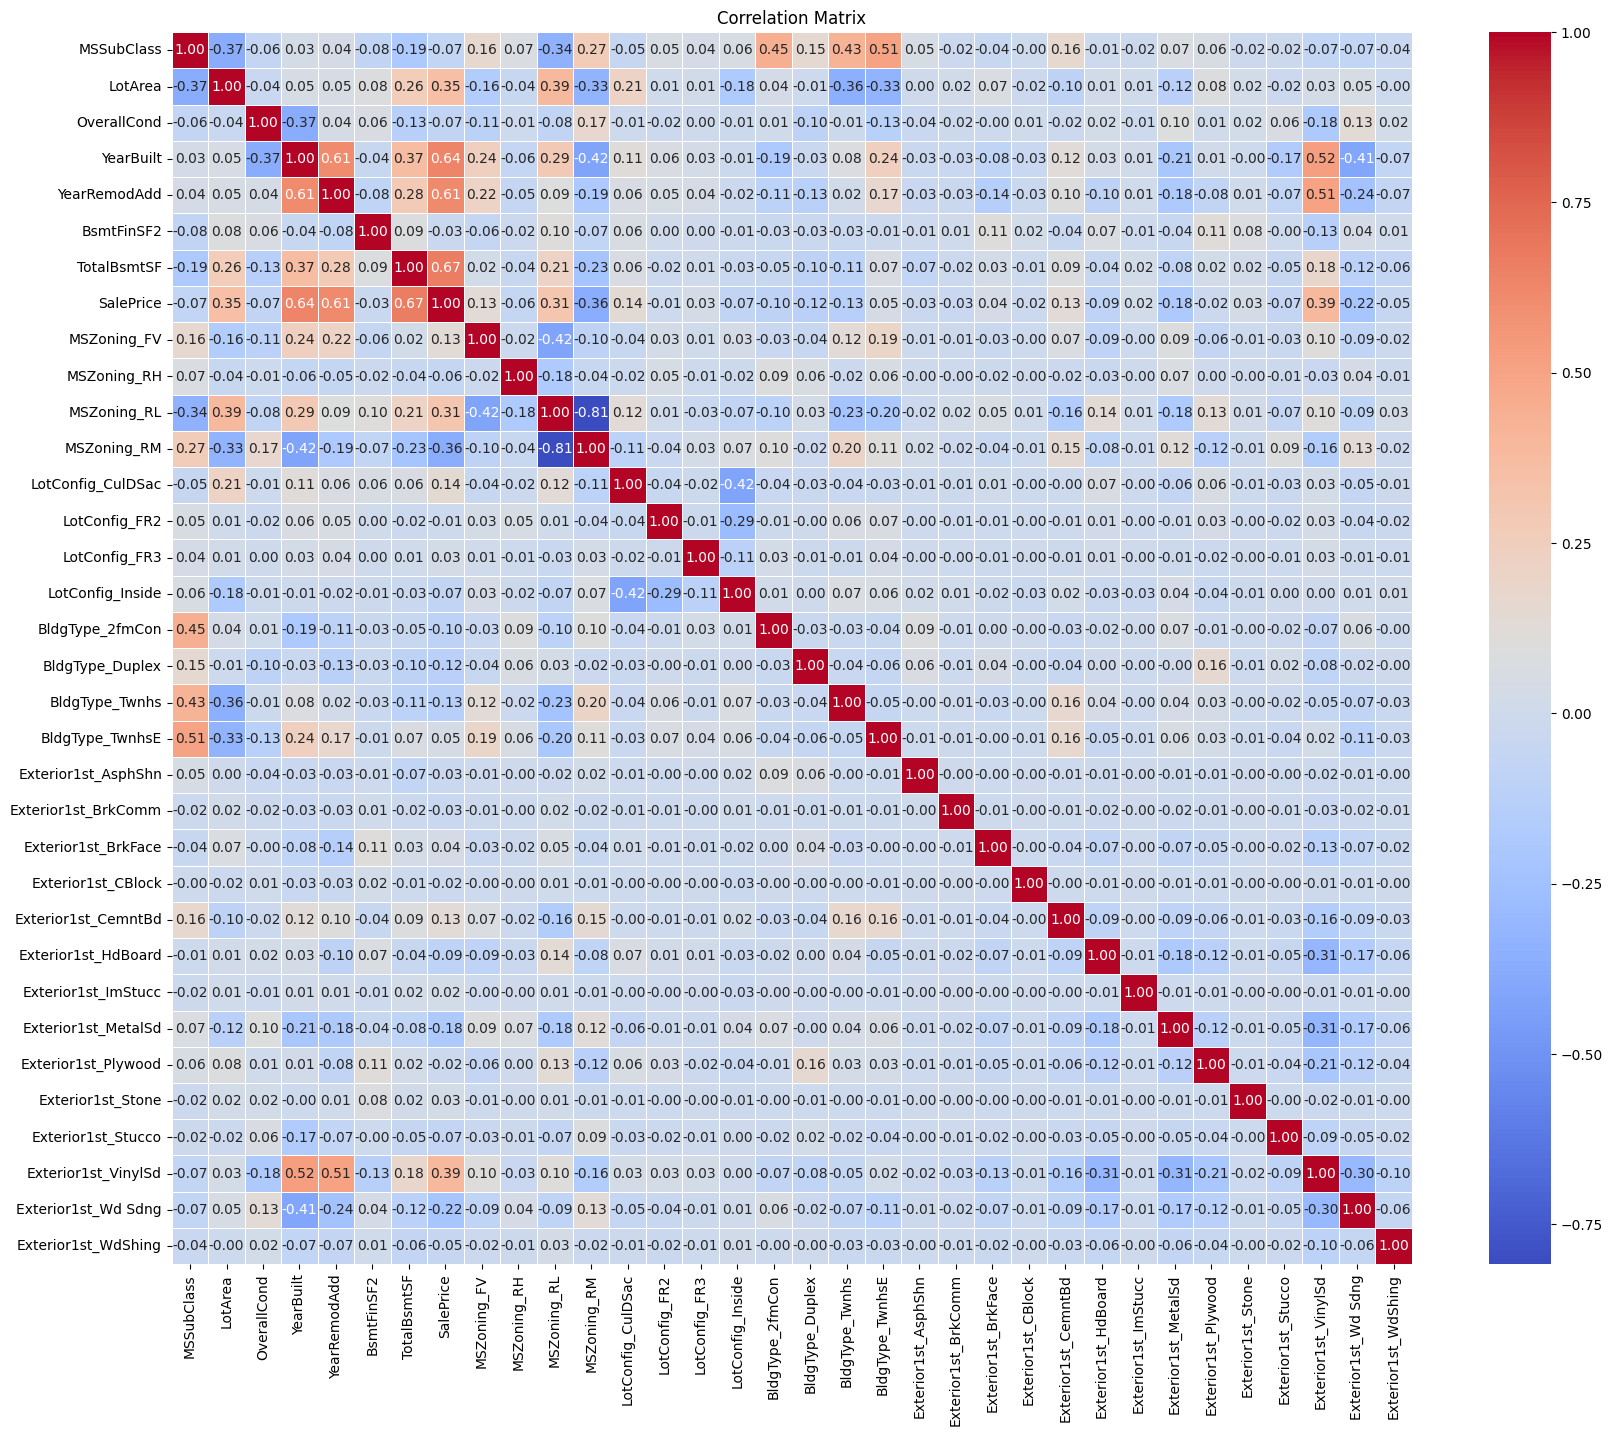

In [35]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [36]:
correlation_with_target

MSSubClass            -0.071275
LotArea                0.351893
OverallCond           -0.074681
YearBuilt              0.637252
YearRemodAdd           0.612811
BsmtFinSF2            -0.026212
TotalBsmtSF            0.666422
MSZoning_FV            0.132092
MSZoning_RH           -0.057104
MSZoning_RL            0.313786
MSZoning_RM           -0.364965
LotConfig_CulDSac      0.142480
LotConfig_FR2         -0.006481
LotConfig_FR3          0.029573
LotConfig_Inside      -0.074232
BldgType_2fmCon       -0.099104
BldgType_Duplex       -0.120008
BldgType_Twnhs        -0.134377
BldgType_TwnhsE        0.046350
Exterior1st_AsphShn   -0.029320
Exterior1st_BrkComm   -0.034016
Exterior1st_BrkFace    0.036896
Exterior1st_CBlock    -0.020891
Exterior1st_CemntBd    0.129065
Exterior1st_HdBoard   -0.091661
Exterior1st_ImStucc    0.021501
Exterior1st_MetalSd   -0.184012
Exterior1st_Plywood   -0.023913
Exterior1st_Stone      0.029092
Exterior1st_Stucco    -0.066420
Exterior1st_VinylSd    0.387001
Exterior

In [37]:
# Identify highly correlated features with target variable
threshold = 0.4  # Adjust threshold as needed
highly_correlated_features_with_target = correlation_with_target[abs(correlation_with_target) > threshold]

In [38]:
highly_correlated_features_with_target

YearBuilt       0.637252
YearRemodAdd    0.612811
TotalBsmtSF     0.666422
Name: SalePrice, dtype: float64

#### Here we can see that 6 features are highly correlated having threshold greater than 0.3, by considering this the features
#### We will be taking is LotArea, YearBuilt, YearRemodAdd, TotalBsmtSF, MSZoning_RL, Exterior1st_VinylSd

In [39]:
#Moving onto the next part is train test split
from sklearn.model_selection import train_test_split

In [40]:
#Splitting into independent and dependent variables
ind = df[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'Exterior1st_VinylSd']]
dep = df['SalePrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=0)

In [42]:
#Now coming onto the model selection where we will be predicting the house price based on these features.
#So, moedls we will choose for house prediction will be Linear Regression, Support Vector Machines and Random Forest Regressor.
#Importing the libraries based on the models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [43]:
#Creating an instance of all the models
svr = svm.SVR()
lr = LinearRegression()

In [44]:
#Taking the models in the loop and printing their mean_absolute_error so as to check the accuracy
models = [svr, lr]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Mean Error of {model} is:', mean_absolute_error(y_test, y_pred))
    mean_true_values = np.mean(y_test)  # Compute the mean of true values
    absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)
    mape = np.mean(absolute_percentage_errors) * 100  # Calculate MAPE
    print("Mean Absolute Percentage Error is: {:.2f}%".format(mape))

Mean Error of SVR() is: 1.2082412611064934
Mean Absolute Percentage Error is: 6.13%
Mean Error of LinearRegression() is: 0.7582133233879319
Mean Absolute Percentage Error is: 3.84%


In [45]:
#This model is for random forest and taking nestimators.
rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Mean Error of RandomForestRegressor is:', mean_absolute_error(y_test, y_pred))
mean_true_values = np.mean(y_test)  # Compute the mean of true values
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)
mape = np.mean(absolute_percentage_errors) * 100  # Calculate MAPE
print("Mean Absolute Percentage Error is: {:.2f}%".format(mape))

Mean Error of RandomForestRegressor is: 0.7383903876953056
Mean Absolute Percentage Error is: 3.74%


##### And this we complete our model with respective to our problem statement.